## Step 1: Importing Required Libraries

To start our analysis, I am importing the libraries needed for data handling, numerical computations, and visualization.

- `pandas` is used for data manipulation and analysis.  
- `numpy` helps in generating and working with numerical data.  
- `matplotlib.pyplot` and `seaborn` are used to create meaningful visualizations that can communicate insights effectively.  
- I also set some visualization preferences to make our charts easier to interpret.

Let's import these libraries now.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting aesthetics
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


## Step 2: Loading and Exploring the Dataset

For this project, I generated a synthetic dataset that simulates influencer marketing performance. Each row represents an influencer, with key metrics such as:

- `followers`: The total number of social media followers.
- `reach`: The estimated number of people reached through their content.
- `engagement_rate (%)`: The percentage of people reached who engaged with the content.
- `clicks`: The number of people who clicked through to the campaign.
- `conversion_rate (%)`: The percentage of clicks that converted into sales.
- `conversions`: The total number of conversions attributed to the influencer.
- `CPC ($)`: The cost per click paid to the influencer.
- `cost ($)`: The total cost spent on that influencer.
- `revenue_per_conversion ($)`: The revenue earned per conversion.
- `revenue ($)`: The total revenue generated.
- `ROI`: The return on investment, calculated as `(revenue - cost) / cost`.

Let's load and preview the first few rows of this dataset.


In [3]:
import os

# Path to the dataset in your Downloads folder
file_path = os.path.expanduser("~/Downloads/influencer_roi_dataset.csv")

# Load the dataset
df = pd.read_csv(file_path)

# Preview the first few rows
df.head()


,influencer_id,followers,reach,engagement_rate (%),clicks,conversion_rate (%),conversions,CPC ($),cost ($),revenue_per_conversion ($),revenue ($),ROI
0,inf_001,131958,65330,0.50,326,4.73,15,0.95,309.70,63.09,946.35,2.06
1,inf_002,681155,274491,3.85,10567,2.29,241,0.60,6340.20,98.10,23642.10,2.73
2,inf_003,141932,79929,3.40,2717,2.83,76,1.48,4021.16,53.81,4089.56,0.02
3,inf_004,375838,159933,2.06,3294,4.27,140,0.73,2404.62,91.55,12817.00,4.33
4,inf_005,269178,150061,5.57,8358,3.54,295,1.30,10865.40,49.10,14484.50,0.33


## Step 3: Summary Statistics and Feature Overview

Now that the dataset is loaded, I want to understand the distribution of key metrics. This will help identify outliers, skewed variables, and general trends in influencer performance.

In this step, I’ll use `.info()` to inspect data types and missing values, and `.describe()` to summarize numerical features such as cost, revenue, and ROI.

This provides an essential baseline before diving into more advanced analysis.


In [4]:
# Check the structure and data types
df.info()

# Summary statistics for numeric columns
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   influencer_id               50 non-null     object 
 1   followers                   50 non-null     int64  
 2   reach                       50 non-null     int64  
 3   engagement_rate (%)         50 non-null     float64
 4   clicks                      50 non-null     int64  
 5   conversion_rate (%)         50 non-null     float64
 6   conversions                 50 non-null     int64  
 7   CPC ($)                     50 non-null     float64
 8   cost ($)                    50 non-null     float64
 9   revenue_per_conversion ($)  50 non-null     float64
 10  revenue ($)                 50 non-null     float64
 11  ROI                         50 non-null     float64
dtypes: float64(7), int64(4), object(1)
memory usage: 4.8+ KB


,count,mean,std,min,25%,50%,75%,max
followers,50.0,417807.1400,292531.419150,51090.00,161309.7500,338217.000,663144.0000,999436.00
reach,50.0,153761.7600,125378.761276,8994.00,54693.2500,107245.500,262761.7500,431181.00
engagement_rate (%),50.0,4.8084,2.556498,0.50,2.8275,4.370,7.0525,9.98
clicks,50.0,7881.0400,9099.629145,212.00,2400.2500,4138.000,9091.5000,35500.00
conversion_rate (%),50.0,3.0958,1.251088,0.58,1.9550,2.975,4.3000,4.98
conversions,50.0,264.8200,358.361560,2.00,52.5000,121.000,265.7500,1530.00
CPC ($),50.0,0.7600,0.409370,0.07,0.4575,0.715,1.0700,1.48
cost ($),50.0,5960.4730,8767.421320,131.44,1052.4825,2458.035,6649.7100,41217.85
revenue_per_conversion ($),50.0,54.5838,25.501747,10.47,35.5150,52.990,72.9500,99.51
revenue ($),50.0,13857.7724,19572.203565,94.23,2271.7650,6103.390,14142.8750,91417.50


## Step 4: ROI Distribution and Performance Insights

Return on Investment (ROI) is the core metric in this analysis. It tells us how much return was generated for every dollar spent on an influencer.

In this step, I want to explore the distribution of ROI across all influencers. A visual histogram will help me understand whether most influencers performed well or if only a few delivered significant value.

I’ll also generate a boxplot to identify potential outliers  influencers with either extremely high or negative ROI.


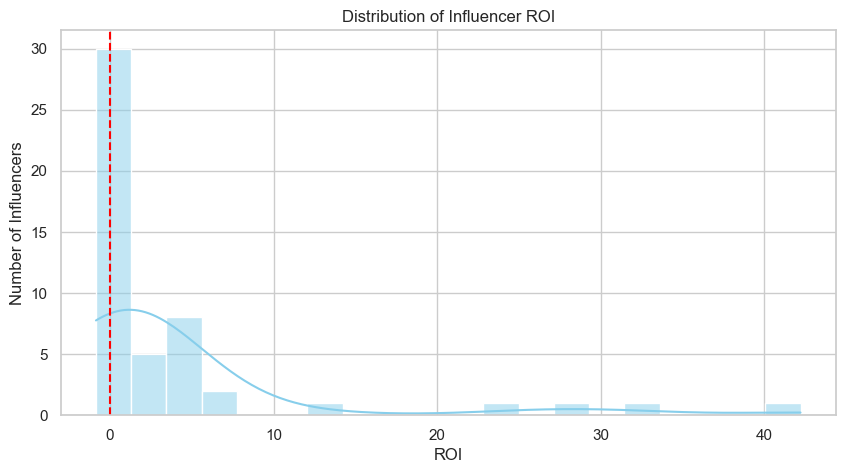

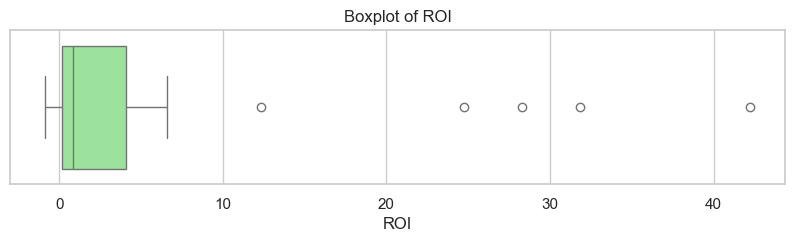

In [5]:
# Histogram of ROI
plt.figure(figsize=(10, 5))
sns.histplot(df['ROI'], bins=20, kde=True, color='skyblue')
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribution of Influencer ROI")
plt.xlabel("ROI")
plt.ylabel("Number of Influencers")
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['ROI'], color='lightgreen')
plt.title("Boxplot of ROI")
plt.show()


## Step 5: Identifying Top and Bottom Performing Influencers

To translate this analysis into actionable strategy, I want to identify the best and worst performers based on ROI.

This step involves sorting the influencers by ROI to reveal who delivered the most value and who might not be worth further investment.

We'll extract:
- The top 5 influencers with the highest ROI
- The bottom 5 influencers with the lowest ROI


In [6]:
# Top 5 influencers by ROI
top_performers = df.sort_values(by='ROI', ascending=False).head(5)
print("Top 5 Influencers by ROI:")
display(top_performers[['influencer_id', 'ROI', 'revenue ($)', 'cost ($)', 'conversions']])

# Bottom 5 influencers by ROI
bottom_performers = df.sort_values(by='ROI', ascending=True).head(5)
print("Bottom 5 Influencers by ROI:")
display(bottom_performers[['influencer_id', 'ROI', 'revenue ($)', 'cost ($)', 'conversions']])


Top 5 Influencers by ROI:


,influencer_id,ROI,revenue ($),cost ($),conversions
11,inf_012,42.21,66951.72,1549.59,1089
43,inf_044,31.86,71640.25,2180.29,1199
7,inf_008,28.30,6879.60,234.78,98
47,inf_048,24.72,6178.80,240.24,95
17,inf_018,12.32,38578.81,2896.20,431


Bottom 5 Influencers by ROI:


,influencer_id,ROI,revenue ($),cost ($),conversions
49,inf_050,-0.85,94.23,610.20,9
33,inf_034,-0.80,1993.48,9950.40,122
39,inf_040,-0.78,429.33,1913.01,11
38,inf_039,-0.68,4901.72,15142.35,134
34,inf_035,-0.58,17452.80,41217.85,606


## Step 6: Spend vs ROI – Visualizing Efficiency

To better understand influencer performance, I want to examine the relationship between total spend and return on investment.

This scatter plot will highlight:
- Influencers who delivered **high ROI with low spend** — highly efficient.
- Influencers with **high spend but low ROI** — potential waste of budget.
- Influencers with **high spend and high ROI** — potentially scalable partners.

This kind of visual helps stakeholders quickly identify which influencers should be kept, tested further, or dropped.


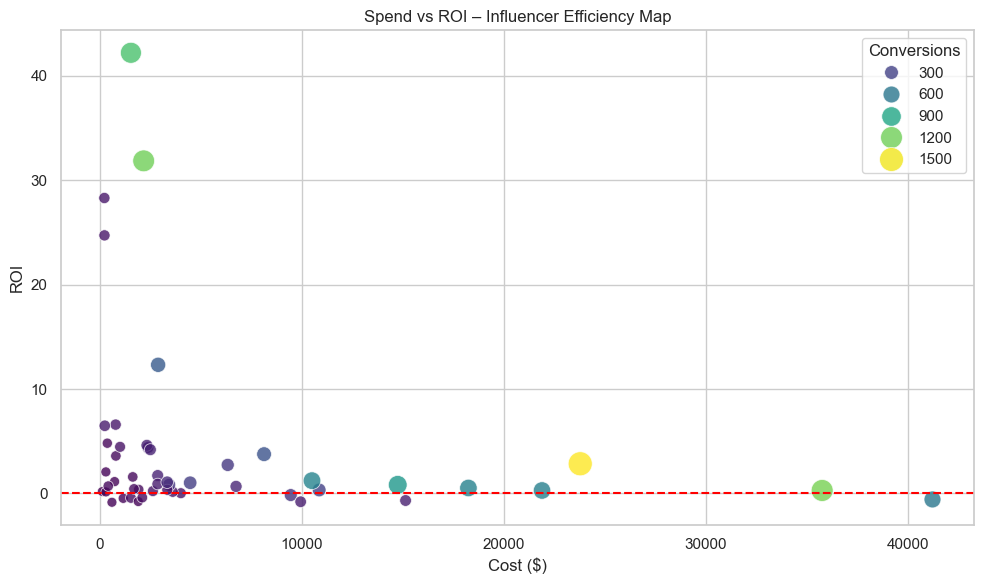

In [7]:
# Scatter plot: Cost vs ROI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cost ($)', y='ROI', hue='conversions', palette='viridis', size='conversions', sizes=(50, 300), alpha=0.8)

plt.axhline(0, color='red', linestyle='--')
plt.title("Spend vs ROI – Influencer Efficiency Map")
plt.xlabel("Cost ($)")
plt.ylabel("ROI")
plt.legend(title='Conversions', loc='upper right')
plt.tight_layout()
plt.show()
